In [1]:
#warnings off
import warnings
warnings.filterwarnings('ignore')

# Part 1: London’s underground resilience

## **I. Topological network**

### I.1. Centrality measures:

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
import seaborn as sns

In [3]:
G = nx.read_graphml('london.graph.xml')

In [4]:
type(G)

networkx.classes.graph.Graph

In [5]:
# list all operations of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10):
    print(dir(G)[i])

76
__init__
degree
graph_attr_dict_factory
adjacency
add_weighted_edges_from
nbunch_iter
has_node
node_attr_dict_factory
graph_attr_dict_factory
__delattr__


In [6]:
print(G.number_of_nodes())
print(G.number_of_edges())

401
467


In [7]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

#### Degree Centrality on nodes:

In [8]:
#  We can calculate the degree centrality using networkx function:
G_degree_cen =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(G_degree_cen),'degree')

In [9]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G, 'source'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted_degree = df.sort_values(["degree"], ascending=False)
df_sorted_degree[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


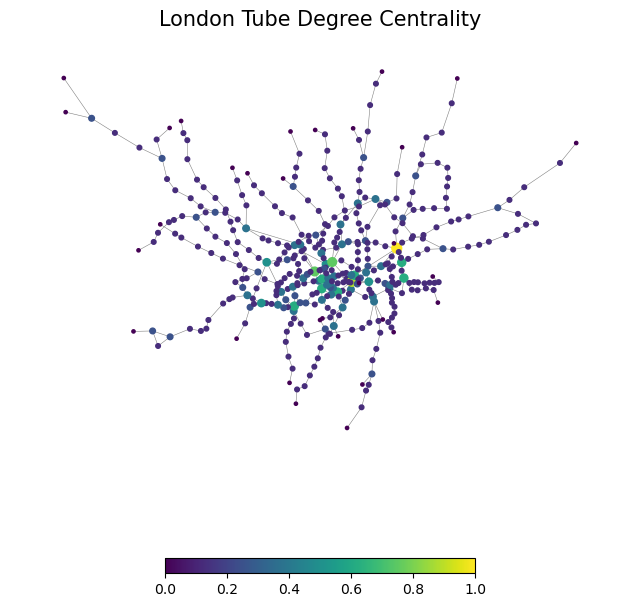

In [10]:
# Ensure the correct layout
pos = nx.get_node_attributes(G, 'coords')
# Convert string representations of tuples into actual tuples of floats, if not already tuples
for node, coord in pos.items():
    if isinstance(coord, str):
        # Strip parentheses and split the string by comma
        coord = coord.strip('()').split(', ')
        # Convert each part to float and create a tuple
        pos[node] = tuple(map(float, coord))

# Compute color and size for the nodes based on degree centrality
degree_values = list(G_degree_cen.values())
deg_color = [deg / max(degree_values) for deg in degree_values]
deg_size = [(deg / max(degree_values)) * 50 for deg in degree_values]

# Now pos contains the corrected coordinates as tuples
# You can attempt to draw the graph again
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4)
nx.draw_networkx_nodes(G, pos, node_color=deg_color, node_size=deg_size)

plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0, 1), cmap='viridis'),
             orientation='horizontal', shrink=0.5)
plt.axis("off")
plt.title("London Tube Degree Centrality", fontsize=15)
plt.show()


#### Betweenness Centrality

In [11]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
G_betwn_cen=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,G_betwn_cen,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted_betw = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_betw[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


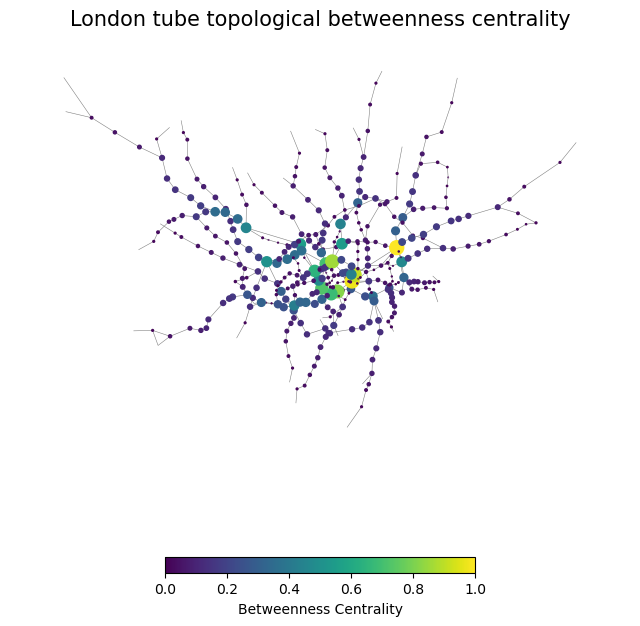

In [12]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(8,8))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### Closeness Centrality:

In [13]:
#topological closeness centrality
G_clos_cen=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,G_clos_cen,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


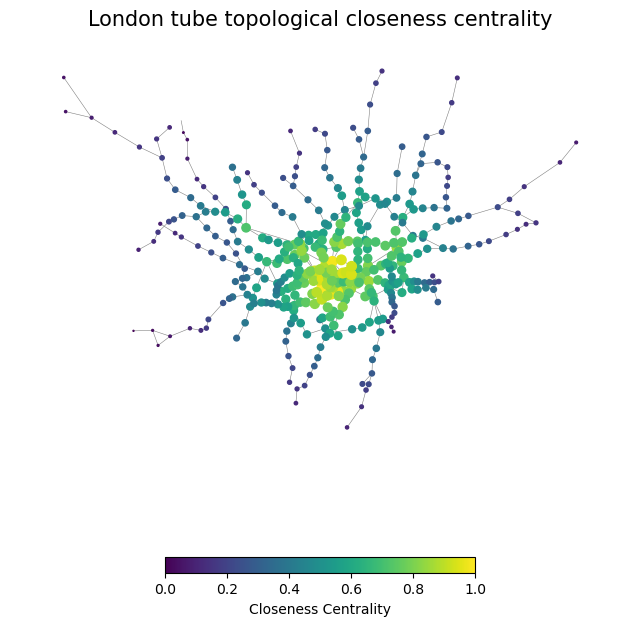

In [14]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(8,8))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

#### I.2. Impact measures

In [15]:
# The average length of the paths 
avg_path_length = nx.average_shortest_path_length(G, weight="length")
print("Average Path Length of the network:", avg_path_length)

Average Path Length of the network: 20099.72157291416


In [16]:
#gloabl efficency
print(f"The global efficiency of the network: {nx.global_efficiency(G)}")

The global efficiency of the network: 0.1012561935972123


#### I.3. Node removal:

In [17]:
degree_top20 = df_sorted_degree.head(20)

In [18]:
degree_top20

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [19]:
# function to evaluate the impact measures after removal
def evaluate_impact(G):
  if not nx.is_connected(G):
    connected_components = list(nx.connected_components(G))
    avg_path_lengths = []
    for component in connected_components:
      subgraph = G.subgraph(component)
      avg_path_length = nx.average_shortest_path_length(subgraph, weight="length")
      avg_path_lengths.append(avg_path_length)
      avg_path_length = sum(avg_path_lengths) / len(avg_path_lengths)
  else:
    avg_path_length = nx.average_shortest_path_length(G, weight="length")

  global_eff = nx.global_efficiency(G)

  return avg_path_length, global_eff

#### degree

In [20]:
### non-sequential node removal ###

# Initialise dataframe to store results
columns = ['nodesRemoved', 'stationRemoved', 'AvgPathLength', 'GlobalEfficiency', 'Method', 'CentralityMeasure']
degree_nonseq_df = pd.DataFrame(columns=columns)  

G_nonseq = G.copy()

base_avg_path_length, base_global_eff = evaluate_impact(G_nonseq)

degree_nonseq_df.loc[0] = [0, 'NA', base_avg_path_length, base_global_eff, 'non-sequential', 'degree']

for i in range(20):
    removed_node = degree_top20.index[i]
    G_nonseq.remove_node(removed_node)
    avg_path_length, global_eff = evaluate_impact(G_nonseq)

    degree_nonseq_df.loc[i+1] = [i+1, removed_node, avg_path_length, global_eff, 'non-sequential', 'degree']

### sequential node removal ###
columns = ['nodesRemoved', 'stationRemoved', 'AvgPathLength', 'GlobalEfficiency', 'Method', 'CentralityMeasure']
degree_seq_df = pd.DataFrame(columns=columns)
degree_seq_df.loc[0] = [0, 'NA', base_avg_path_length, base_global_eff, 'sequential', 'degree']

df_degree_cen = pd.DataFrame.from_dict(G_degree_cen, columns=['degree'], orient='index')
df_degree_cen = df_degree_cen.sort_values(by='degree', ascending=False)

G_seq = G.copy()

for i in range(20):
  G_degree_cen = nx.closeness_centrality(G_seq)
  nx.set_node_attributes(G_seq, G_degree_cen, 'degree')

  df = pd.DataFrame(index=G_seq.nodes())
  df['degree'] = pd.Series(nx.get_node_attributes(G_seq, 'degree'))
  df_sorted = df.sort_values(['degree'], ascending=False)
  row = df_sorted.head(1)
  removed_station = row.index[0]
  G_seq.remove_node(removed_station)

  avg_path_length, global_eff = evaluate_impact(G_seq)

  new_row = pd.DataFrame([[i+1, removed_station, avg_path_length, global_eff, 'sequential', 'degree']], columns=['nodesRemoved', 'stationRemoved', 'AvgPathLength', 'GlobalEfficiency', 'Method', 'CentralityMeasure'])
  degree_seq_df = pd.concat([degree_seq_df, new_row], ignore_index=True)

degree_seq_df.head(10)
     

,nodesRemoved,stationRemoved,AvgPathLength,GlobalEfficiency,Method,CentralityMeasure
0,0,NA,20099.721573,0.101256,sequential,degree
1,1,Green Park,20208.704540,0.099190,sequential,degree
2,2,King's Cross St. Pancras,20761.663553,0.094435,sequential,degree
3,3,Waterloo,20912.819496,0.091816,sequential,degree
4,4,Bank and Monument,23087.194400,0.085426,sequential,degree
5,5,West Hampstead,26106.292754,0.080544,sequential,degree
6,6,Canada Water,17973.654679,0.058101,sequential,degree
7,7,Stratford,11535.087743,0.051884,sequential,degree
8,8,Earl's Court,11790.713536,0.050350,sequential,degree
9,9,Shepherd's Bush,12035.505663,0.044395,sequential,degree


In [21]:
degree_nonseq_df.head(10)

,nodesRemoved,stationRemoved,AvgPathLength,GlobalEfficiency,Method,CentralityMeasure
0,0,NA,20099.721573,0.101256,non-sequential,degree
1,1,Stratford,9648.661686,0.088917,non-sequential,degree
2,2,Bank and Monument,9749.253906,0.085862,non-sequential,degree
3,3,King's Cross St. Pancras,10159.995054,0.080287,non-sequential,degree
4,4,Baker Street,7940.490850,0.075700,non-sequential,degree
5,5,Earl's Court,8102.193592,0.074036,non-sequential,degree
6,6,Oxford Circus,6512.924039,0.072745,non-sequential,degree
7,7,Liverpool Street,5738.729943,0.070948,non-sequential,degree
8,8,Waterloo,5942.075582,0.068982,non-sequential,degree
9,9,Green Park,5972.313402,0.068257,non-sequential,degree


#### betweenness centrality

In [22]:
betw_top20 = df_sorted_betw.head(20)

In [23]:

### non-sequential node removal ###
# Initialise dataframe to store results
columns = ['nodesRemoved', 'stationRemoved', 'AvgPathLength', 'GlobalEfficiency', 'Method', 'CentralityMeasure']
betw_nonseq_df = pd.DataFrame(columns=columns)

G_nonseq = G.copy()

base_avg_path_length, base_global_eff = evaluate_impact(G_nonseq)
betw_nonseq_df.loc[0] = [0, 'NA', base_avg_path_length, base_global_eff, 'non-sequential', 'betweenness']

for i in range(20):
    removed_node = betw_top20.index[i]
    G_nonseq.remove_node(removed_node)
    avg_path_length, global_eff = evaluate_impact(G_nonseq)

    betw_nonseq_df.loc[i+1] = [i+1, removed_node, avg_path_length, global_eff, 'non-sequential', 'betweenness']

### sequential node removal ###
columns = ['nodesRemoved', 'stationRemoved', 'AvgPathLength', 'GlobalEfficiency', 'Method', 'CentralityMeasure']
betw_seq_df = pd.DataFrame(columns=columns)
betw_seq_df.loc[0] = [0, 'NA', base_avg_path_length, base_global_eff, 'sequential', 'betweenness']

df_betw_cen = pd.DataFrame.from_dict(G_betwn_cen, columns=['betweenness'], orient='index')
df_betw_cen = df_betw_cen.sort_values(by='betweenness', ascending=False)

G_seq = G.copy()

for i in range(20):
  G_betwn_cen = nx.betweenness_centrality(G_seq, weight='length', normalized=True)
  nx.set_node_attributes(G_seq, G_betwn_cen, 'betweenness')

  df = pd.DataFrame(index=G_seq.nodes())
  df['betweenness'] = pd.Series(nx.get_node_attributes(G_seq, 'betweenness'))
  df_sorted = df.sort_values(['betweenness'], ascending=False)
  row = df_sorted.head(1)
  removed_station = row.index[0]
  G_seq.remove_node(removed_station)

  avg_path_length, global_eff = evaluate_impact(G_seq)

  new_row = pd.DataFrame([[i+1, removed_station, avg_path_length, global_eff, 'sequential', 'betweenness']], columns=['nodesRemoved', 'stationRemoved', 'AvgPathLength', 'GlobalEfficiency', 'Method', 'CentralityMeasure'])
  betw_seq_df = pd.concat([betw_seq_df, new_row], ignore_index=True)

betw_seq_df.head(10)

,nodesRemoved,stationRemoved,AvgPathLength,GlobalEfficiency,Method,CentralityMeasure
0,0,NA,20099.721573,0.101256,sequential,betweenness
1,1,Bank and Monument,20423.399394,0.096735,sequential,betweenness
2,2,King's Cross St. Pancras,21621.656723,0.089883,sequential,betweenness
3,3,Canada Water,25212.677947,0.083058,sequential,betweenness
4,4,West Hampstead,17617.421029,0.060240,sequential,betweenness
5,5,Earl's Court,18129.009165,0.058734,sequential,betweenness
6,6,Oxford Circus,18381.367498,0.057682,sequential,betweenness
7,7,Shepherd's Bush,16518.452184,0.051808,sequential,betweenness
8,8,Baker Street,10729.035580,0.048191,sequential,betweenness
9,9,Acton Town,9933.374064,0.042189,sequential,betweenness


In [24]:
betw_nonseq_df.head(10)

,nodesRemoved,stationRemoved,AvgPathLength,GlobalEfficiency,Method,CentralityMeasure
0,0,NA,20099.721573,0.101256,non-sequential,betweenness
1,1,Stratford,9648.661686,0.088917,non-sequential,betweenness
2,2,Bank and Monument,9749.253906,0.085862,non-sequential,betweenness
3,3,Liverpool Street,9876.525930,0.084963,non-sequential,betweenness
4,4,King's Cross St. Pancras,8080.322714,0.078498,non-sequential,betweenness
5,5,Waterloo,8399.415778,0.075942,non-sequential,betweenness
6,6,Green Park,8458.202933,0.074152,non-sequential,betweenness
7,7,Euston,8659.588211,0.068206,non-sequential,betweenness
8,8,Westminster,8728.893174,0.067660,non-sequential,betweenness
9,9,Baker Street,7467.477045,0.064700,non-sequential,betweenness


#### closeness centrality

In [25]:
clos_top20 = df_sorted_clos.head(20)

In [26]:
### non-sequential node removal ###

# Initialise dataframe to store results
columns = ['nodesRemoved', 'stationRemoved', 'AvgPathLength', 'GlobalEfficiency', 'Method', 'CentralityMeasure']
clos_nonseq_df = pd.DataFrame(columns=columns)

G_nonseq = G.copy()

base_avg_path_length, base_global_eff = evaluate_impact(G_nonseq)

clos_nonseq_df.loc[0] = [0, 'NA', base_avg_path_length, base_global_eff, 'non-sequential', 'closeness']

for i in range(20):
    removed_node = clos_top20.index[i]
    G_nonseq.remove_node(removed_node)
    avg_path_length, global_eff = evaluate_impact(G_nonseq)

    clos_nonseq_df.loc[i+1] = [i+1, removed_node, avg_path_length, global_eff, 'non-sequential', 'closeness']

### sequential node removal ###
columns = ['nodesRemoved', 'stationRemoved', 'AvgPathLength', 'GlobalEfficiency', 'Method', 'CentralityMeasure']
clos_seq_df = pd.DataFrame(columns=columns)
clos_seq_df.loc[0] = [0, 'NA', base_avg_path_length, base_global_eff, 'sequential', 'closeness']

df_clos_cen = pd.DataFrame.from_dict(G_clos_cen, columns=['closeness'], orient='index')
df_clos_cen = df_clos_cen.sort_values(by='closeness', ascending=False)

G_seq = G.copy()

for i in range(20):
  G_clos_cen = nx.closeness_centrality(G_seq)
  nx.set_node_attributes(G_seq, G_clos_cen, 'closeness')

  df = pd.DataFrame(index=G_seq.nodes())
  df['closeness'] = pd.Series(nx.get_node_attributes(G_seq, 'closeness'))
  df_sorted = df.sort_values(['closeness'], ascending=False)
  row = df_sorted.head(1)
  removed_station = row.index[0]
  G_seq.remove_node(removed_station)

  avg_path_length, global_eff = evaluate_impact(G_seq)

  new_row = pd.DataFrame([[i+1, removed_station, avg_path_length, global_eff, 'sequential', 'closeness']], columns=['nodesRemoved', 'stationRemoved', 'AvgPathLength', 'GlobalEfficiency', 'Method', 'CentralityMeasure'])
  clos_seq_df = pd.concat([clos_seq_df, new_row], ignore_index=True)

clos_seq_df.head(10)

,nodesRemoved,stationRemoved,AvgPathLength,GlobalEfficiency,Method,CentralityMeasure
0,0,NA,20099.721573,0.101256,sequential,closeness
1,1,Green Park,20208.704540,0.099190,sequential,closeness
2,2,King's Cross St. Pancras,20761.663553,0.094435,sequential,closeness
3,3,Waterloo,20912.819496,0.091816,sequential,closeness
4,4,Bank and Monument,23087.194400,0.085426,sequential,closeness
5,5,West Hampstead,26106.292754,0.080544,sequential,closeness
6,6,Canada Water,17973.654679,0.058101,sequential,closeness
7,7,Stratford,11535.087743,0.051884,sequential,closeness
8,8,Earl's Court,11790.713536,0.050350,sequential,closeness
9,9,Shepherd's Bush,12035.505663,0.044395,sequential,closeness


In [27]:
clos_nonseq_df.head(10)

,nodesRemoved,stationRemoved,AvgPathLength,GlobalEfficiency,Method,CentralityMeasure
0,0,NA,20099.721573,0.101256,non-sequential,closeness
1,1,Green Park,20208.704540,0.099190,non-sequential,closeness
2,2,Bank and Monument,20544.708154,0.094872,non-sequential,closeness
3,3,King's Cross St. Pancras,21721.171535,0.087934,non-sequential,closeness
4,4,Westminster,22034.237431,0.087372,non-sequential,closeness
5,5,Waterloo,23484.602201,0.084859,non-sequential,closeness
6,6,Oxford Circus,24567.292132,0.082781,non-sequential,closeness
7,7,Bond Street,24608.474610,0.082581,non-sequential,closeness
8,8,Farringdon,24625.343903,0.082600,non-sequential,closeness
9,9,Angel,24635.946027,0.082622,non-sequential,closeness


#### Visualisation

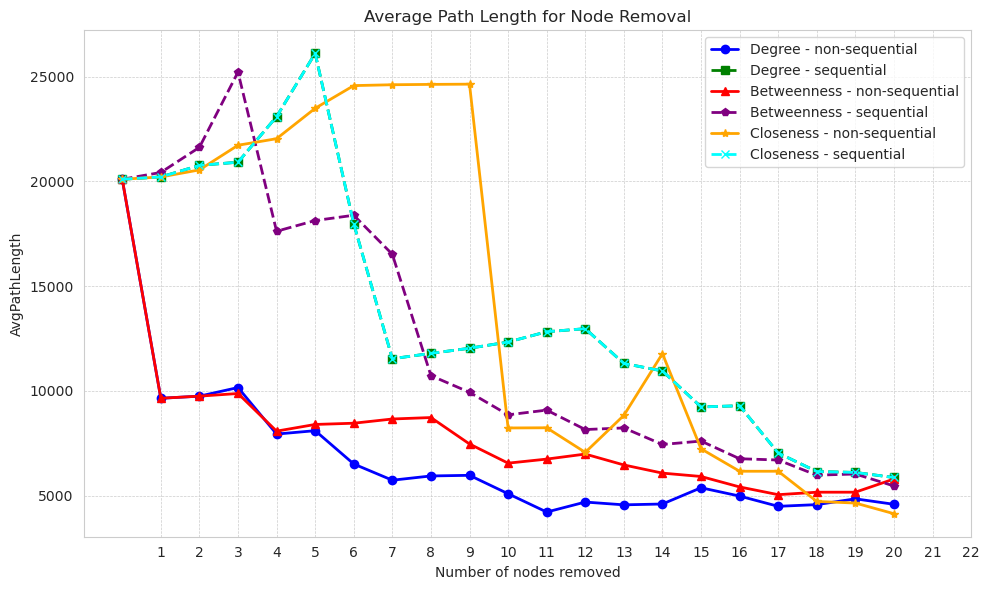

<Figure size 640x480 with 0 Axes>

In [28]:
#Average Path Length
sns.set_style("whitegrid")
dataframes = [degree_nonseq_df, degree_seq_df, betw_nonseq_df, betw_seq_df, clos_nonseq_df, clos_seq_df]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
labels = ['Degree', 'Degree', 'Betweenness', 'Betweenness', 'Closeness', 'Closeness']
line_styles = ['-', '--', '-', '--', '-', '--']
markers = ['o', 's', '^', 'p', '*', 'x']

plt.figure(figsize=(10, 6))

for i, df in enumerate(dataframes):
    plt.plot(df.index, df['AvgPathLength'], label=f'{labels[i]} - {df["Method"].iloc[0]}',
             color=colors[i], linestyle=line_styles[i], marker=markers[i], linewidth=2)

plt.xlabel('Number of nodes removed')
plt.ylabel('AvgPathLength')
plt.title('Average Path Length for Node Removal')
plt.legend()
plt.xticks(range(1, 23))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

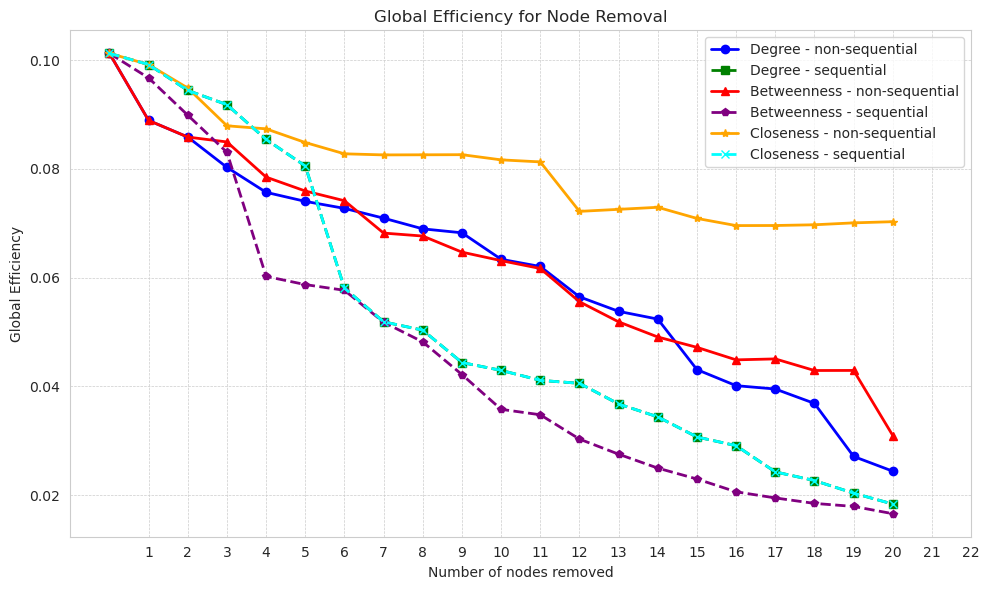

In [37]:
#Global Efficiency
sns.set_style("whitegrid")
dataframes = [degree_nonseq_df, degree_seq_df, betw_nonseq_df, betw_seq_df, clos_nonseq_df, clos_seq_df]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
labels = ['Degree', 'Degree', 'Betweenness', 'Betweenness', 'Closeness', 'Closeness']
line_styles = ['-', '--', '-', '--', '-', '--']
markers = ['o', 's', '^', 'p', '*', 'x']

plt.figure(figsize=(10, 6))

for i, df in enumerate(dataframes):
    plt.plot(df.index, df['GlobalEfficiency'], label=f'{labels[i]} - {df["Method"].iloc[0]}',
             color=colors[i], linestyle=line_styles[i], marker=markers[i], linewidth=2)

plt.xlabel('Number of nodes removed')
plt.ylabel('Global Efficiency')
plt.title('Global Efficiency for Node Removal')
plt.legend()
plt.xticks(range(1, 23))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## II. Flows: weighted network

### II.1.

#### Weighted Betweenness Centrality

In [30]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='length',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [38]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,betweenness_w
Bank and Monument,17656.0
King's Cross St. Pancras,16693.0
Stratford,14548.0
Oxford Circus,13561.0
Euston,13240.0
Baker Street,12150.0
Earl's Court,11475.0
Shadwell,11128.0
Waterloo,10408.0
South Kensington,10335.0


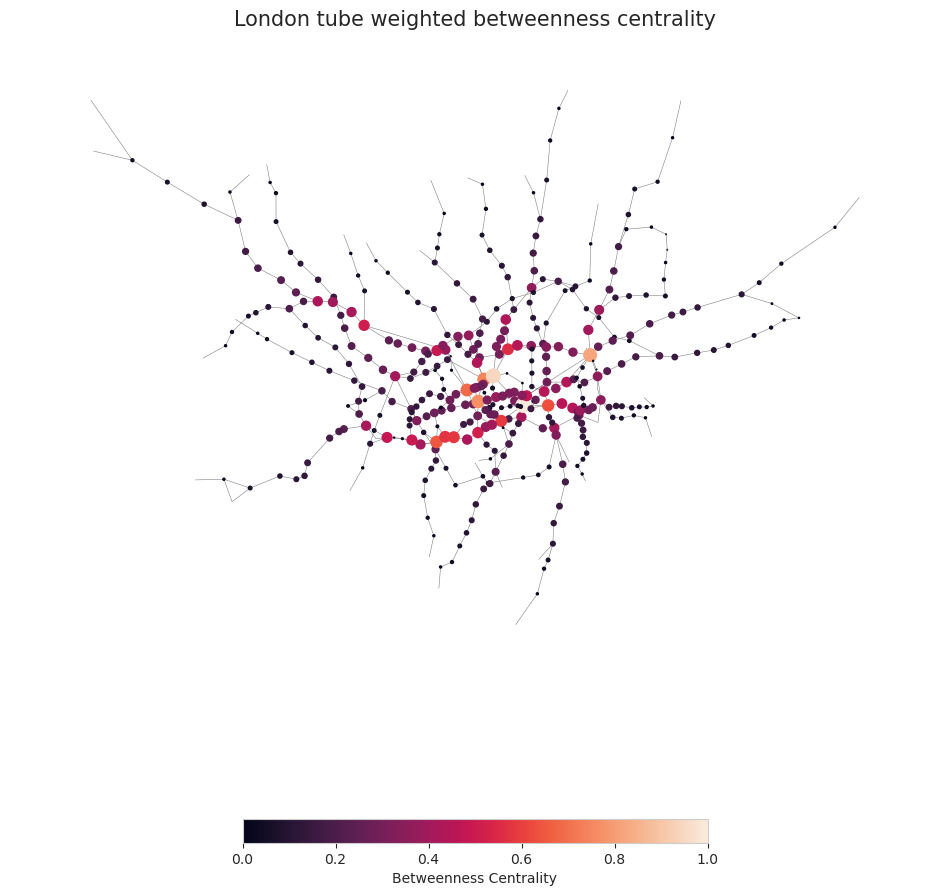

In [32]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted betweenness centrality",fontsize=15)
plt.show()

### Weighted Closeness Centrality

In [33]:

# #Weighted closeness centrality: 
# clos_w=nx.closeness_centrality(G, distance='length')
# # Set the inverted weights as an attribute to the edges in the graph
# # We can add these values to the nodes attributes:
# nx.set_node_attributes(G,clos_w,'closeness_w')

# # To ataframe using the nodes as the index
# df = pd.DataFrame(index=G.nodes())
# df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
# df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

# df_sorted = df.sort_values(["closeness_w"], ascending=False)
# df_sorted[0:10]# Invert the weights where higher weights (more passengers) result in smaller "distances"
# inverted_weights = {(e1, e2): round(1.0 / weight, 7) for e1, e2, weight in G.edges(data='flow') if weight is not None}
# nx.set_node_attributes(G,clos_w,'closeness_w')

# # Print edge list with updated attributes to verify
# list(G.edges(data=True))[:10]


In [34]:
# Note that we have to invert the weights, since they are meant to represent a distance.
# the higher the value to closer they are
v_weights = {(e1, e2): round(1.0 / weight, 7) for e1, e2, weight in G.edges(data='length') if weight is not None}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, v_weights, 'v_weights')

# Print edge list with attributes
list(G.edges(data = True))[0:10]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'v_weights': 0.0003428}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'v_weights': 0.000425}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36601,
   'v_weights': 0.0007044}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648,
   'line_name': 'Metropolitan',
   'flows': 55216,
   'v_weights': 0.0001376}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068,
   'line_name': 'Jubilee',
   'flows': 9419,
   'v_weights': 0.0008026}),
 ('Queensbury',
  'Canons Park',
  {'length': 1693.307343195774,
   'line_name': 'Jubilee',
   'flows': 6385,
   'v_weights': 0.0005906}),
 ('Canons Park',
  'Stanmore',
  {'length': 1419.6694762456716,
   'line_name': 'Jubilee',
   'flows': 3624,
   'v_weights': 0.0007044}),
 ('Stratfo

In [35]:
clos_w=nx.closeness_centrality(G, distance='v_weights')
# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G,clos_w,'closeness_w')

pd.DataFrame.from_dict(clos_w,columns=['closeness_w'],orient='index')[0:10]

,closeness_w
Wembley Park,126.305841
Kingsbury,121.152041
Queensbury,110.538048
Canons Park,103.811661
Stanmore,96.754204
Stratford,129.822483
West Ham,124.078277
Canning Town,119.000292
North Greenwich,115.185560
Canary Wharf,114.800499


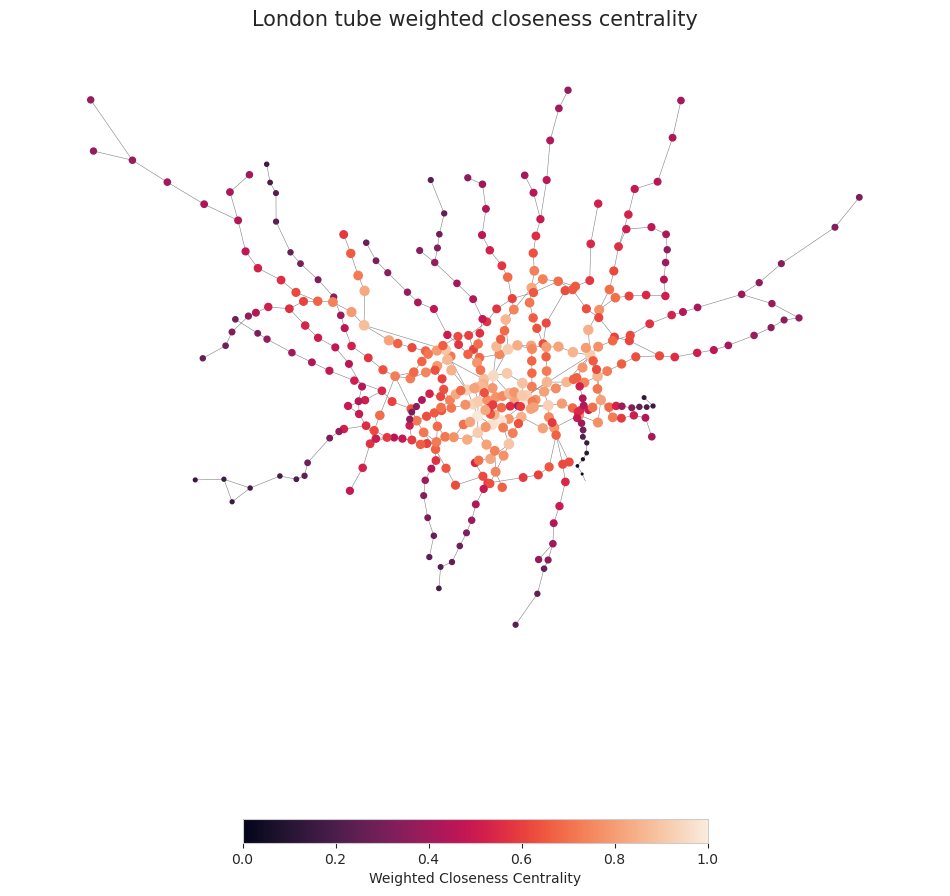

In [36]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Weighted Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()